# Compute Drawdowns

<AxesSubplot:>

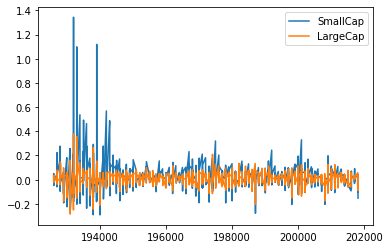

In [3]:
import pandas as pd
me_m=returns=pd.read_csv('data\Portfolios_Formed_on_ME_monthly_EW.csv',header=0,index_col=0,parse_dates=True,na_values=-99.99)
rets=me_m[['Lo 10','Hi 10']]
rets.columns=['SmallCap','LargeCap']
rets=rets/100
rets.plot.line()

In [4]:
rets.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

In [5]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [6]:
rets.index=pd.to_datetime(rets.index,format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [7]:
rets.index = rets.index.to_period('M')
rets.head()

SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270

In [9]:
rets.loc["1975"]

SmallCap  LargeCap
1975-01    0.3202    0.1286
1975-02    0.0657    0.0613
1975-03    0.0989    0.0414
1975-04    0.0288    0.0531
1975-05    0.0811    0.0610
1975-06    0.0779    0.0524
1975-07    0.0218   -0.0703
1975-08   -0.0525   -0.0177
1975-09   -0.0351   -0.0468
1975-10   -0.0009    0.0620
1975-11    0.0129    0.0323
1975-12   -0.0042   -0.0159

# Compute Drawdonws
1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which i sthe weatlh value as a percentage of the previous peak

In [10]:
wealth_index=1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

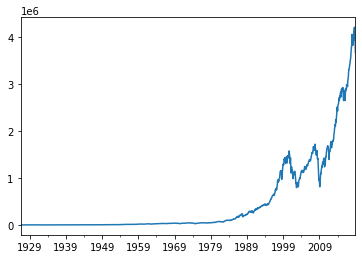

In [11]:
wealth_index.plot.line()

<AxesSubplot:>

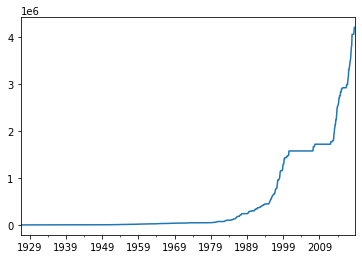

In [12]:
previous_peaks=wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

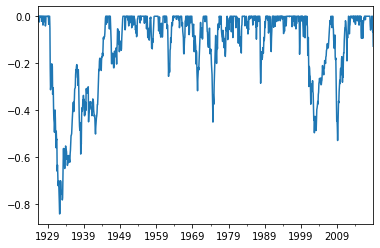

In [13]:
drawdown =(wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [14]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [15]:
drawdown.min()

-0.8400375277943123

In [19]:
drawdown.loc["1975":].idxmin()

-0.5280945042309304

In [20]:
drawdown.idxmin()

Period('1932-05', 'M')

In [22]:
def drawdown(return_series: pd.Series):
    """
        Takes a time series of asset returns.
        returns a DataFrame with columns for
        the wealth index, 
        the previous peaks, and 
        the percentage drawdown    
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [26]:
data_frame=drawdown(rets["LargeCap"])
data_frame.head()

Wealth  Previous Peak  Drawdown
1926-07  1032.900000    1032.900000    0.0000
1926-08  1071.117300    1071.117300    0.0000
1926-09  1078.293786    1078.293786    0.0000
1926-10  1052.091247    1078.293786   -0.0243
1926-11  1080.497711    1080.497711    0.0000

<AxesSubplot:>

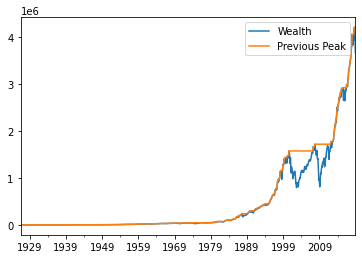

In [27]:
data_frame[['Wealth','Previous Peak']].plot()

<AxesSubplot:>

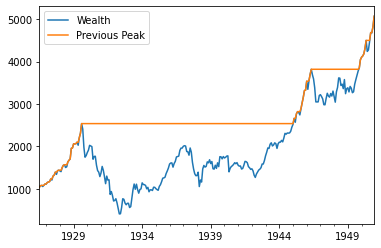

In [29]:
data_frame.loc[:"1950"][['Wealth','Previous Peak']].plot()

In [30]:
data_frame["Drawdown"].min()

-0.8400375277943123